In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qiskit.pulse import Play, Schedule, DriveChannel, ControlChannel, Waveform
from qiskit.pulse.library import drag, GaussianSquare
from qiskit.visualization import SchedStyle
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import qiskit.pulse
from qiskit import pulse, transpile, schedule, assemble, execute
from qiskit.pulse import library
import numpy as np

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science')
backend = provider.get_backend('ibmq_casablanca')

style = SchedStyle(figsize=(20, 10))
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 15]

coupling_map = backend.configuration().coupling_map
back_defaults = backend.defaults()
back_configuration = backend.configuration()
back_properties = backend.properties()
inst_map = back_defaults.instruction_schedule_map

ibmqfactory.load_account:WARNING:2021-04-01 13:49:23,068: Credentials are already in use. The existing account in the session will be replaced.


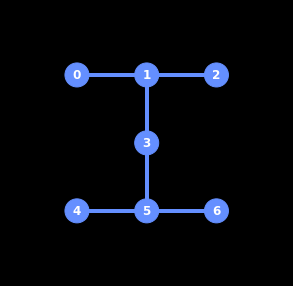

In [57]:
from qiskit.visualization import plot_gate_map
plot_gate_map(backend)

# normal SWAP transpiled

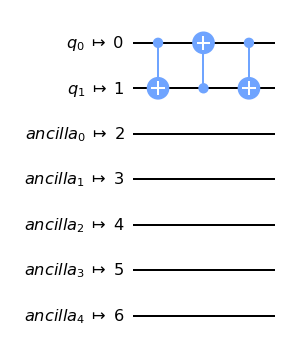

In [58]:
qc = QuantumCircuit(2)
qc.swap(0,1)

qc_transpiled = transpile(qc, backend, optimization_level=1)
qc_transpiled.draw(style=style)



# Schedule for normal SWAP transpiled

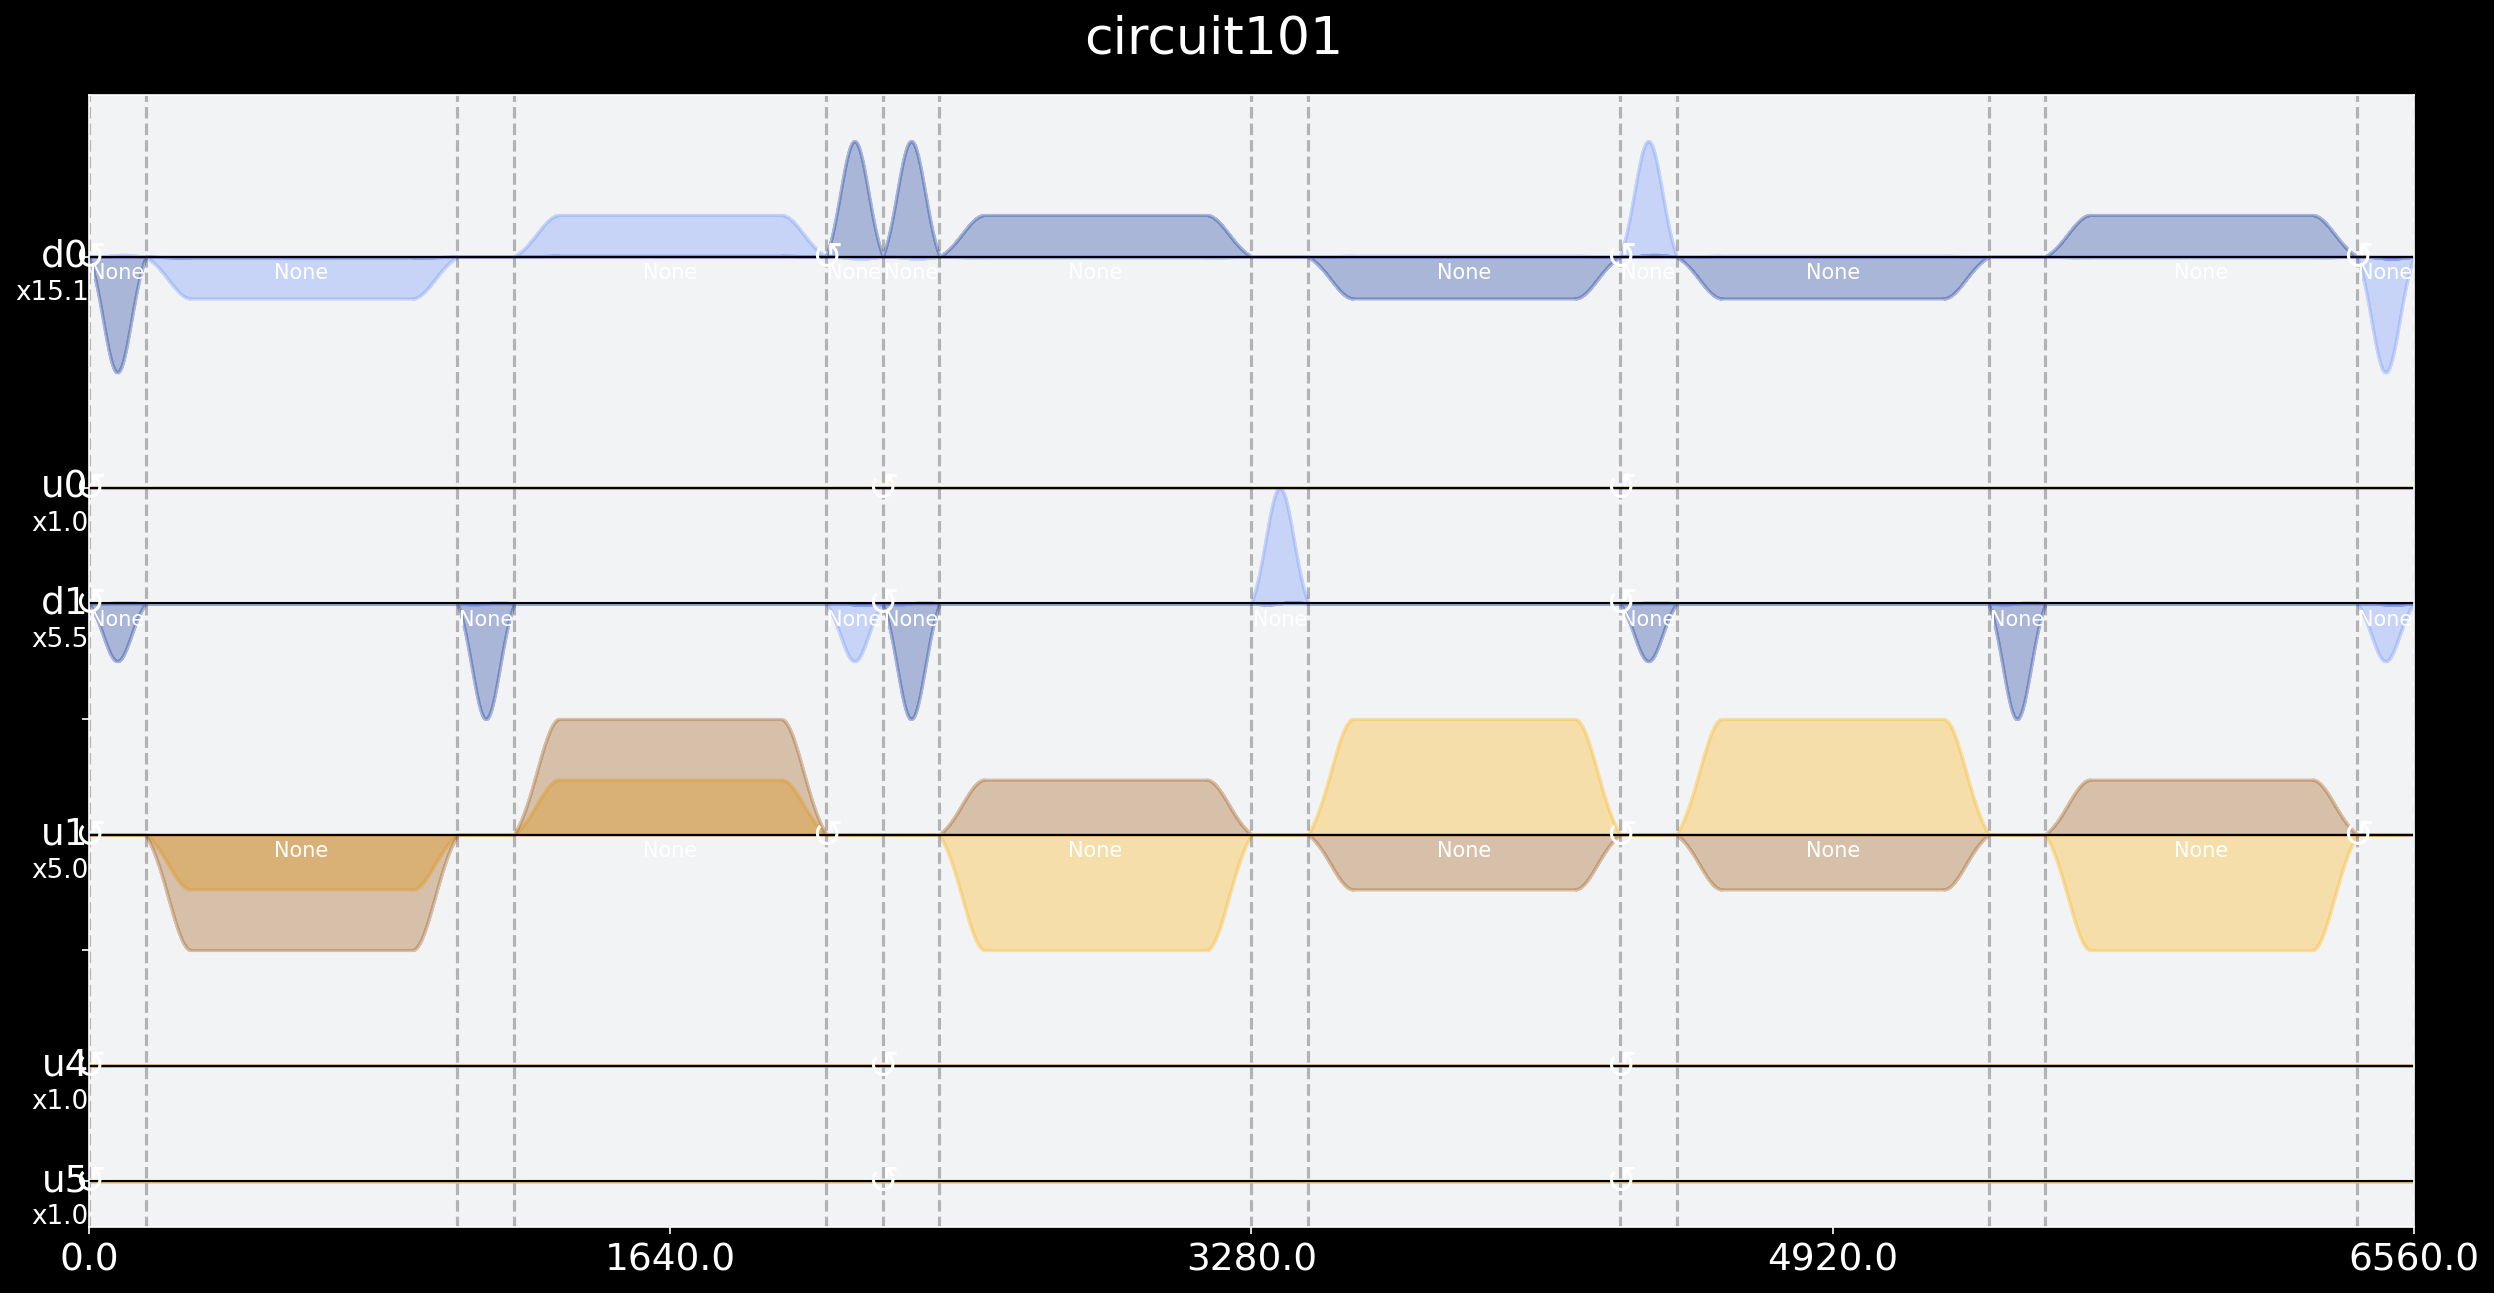

In [59]:
sched = schedule(qc_transpiled, backend, inst_map=inst_map)
pulse_drawer(sched, style=style,label=True)

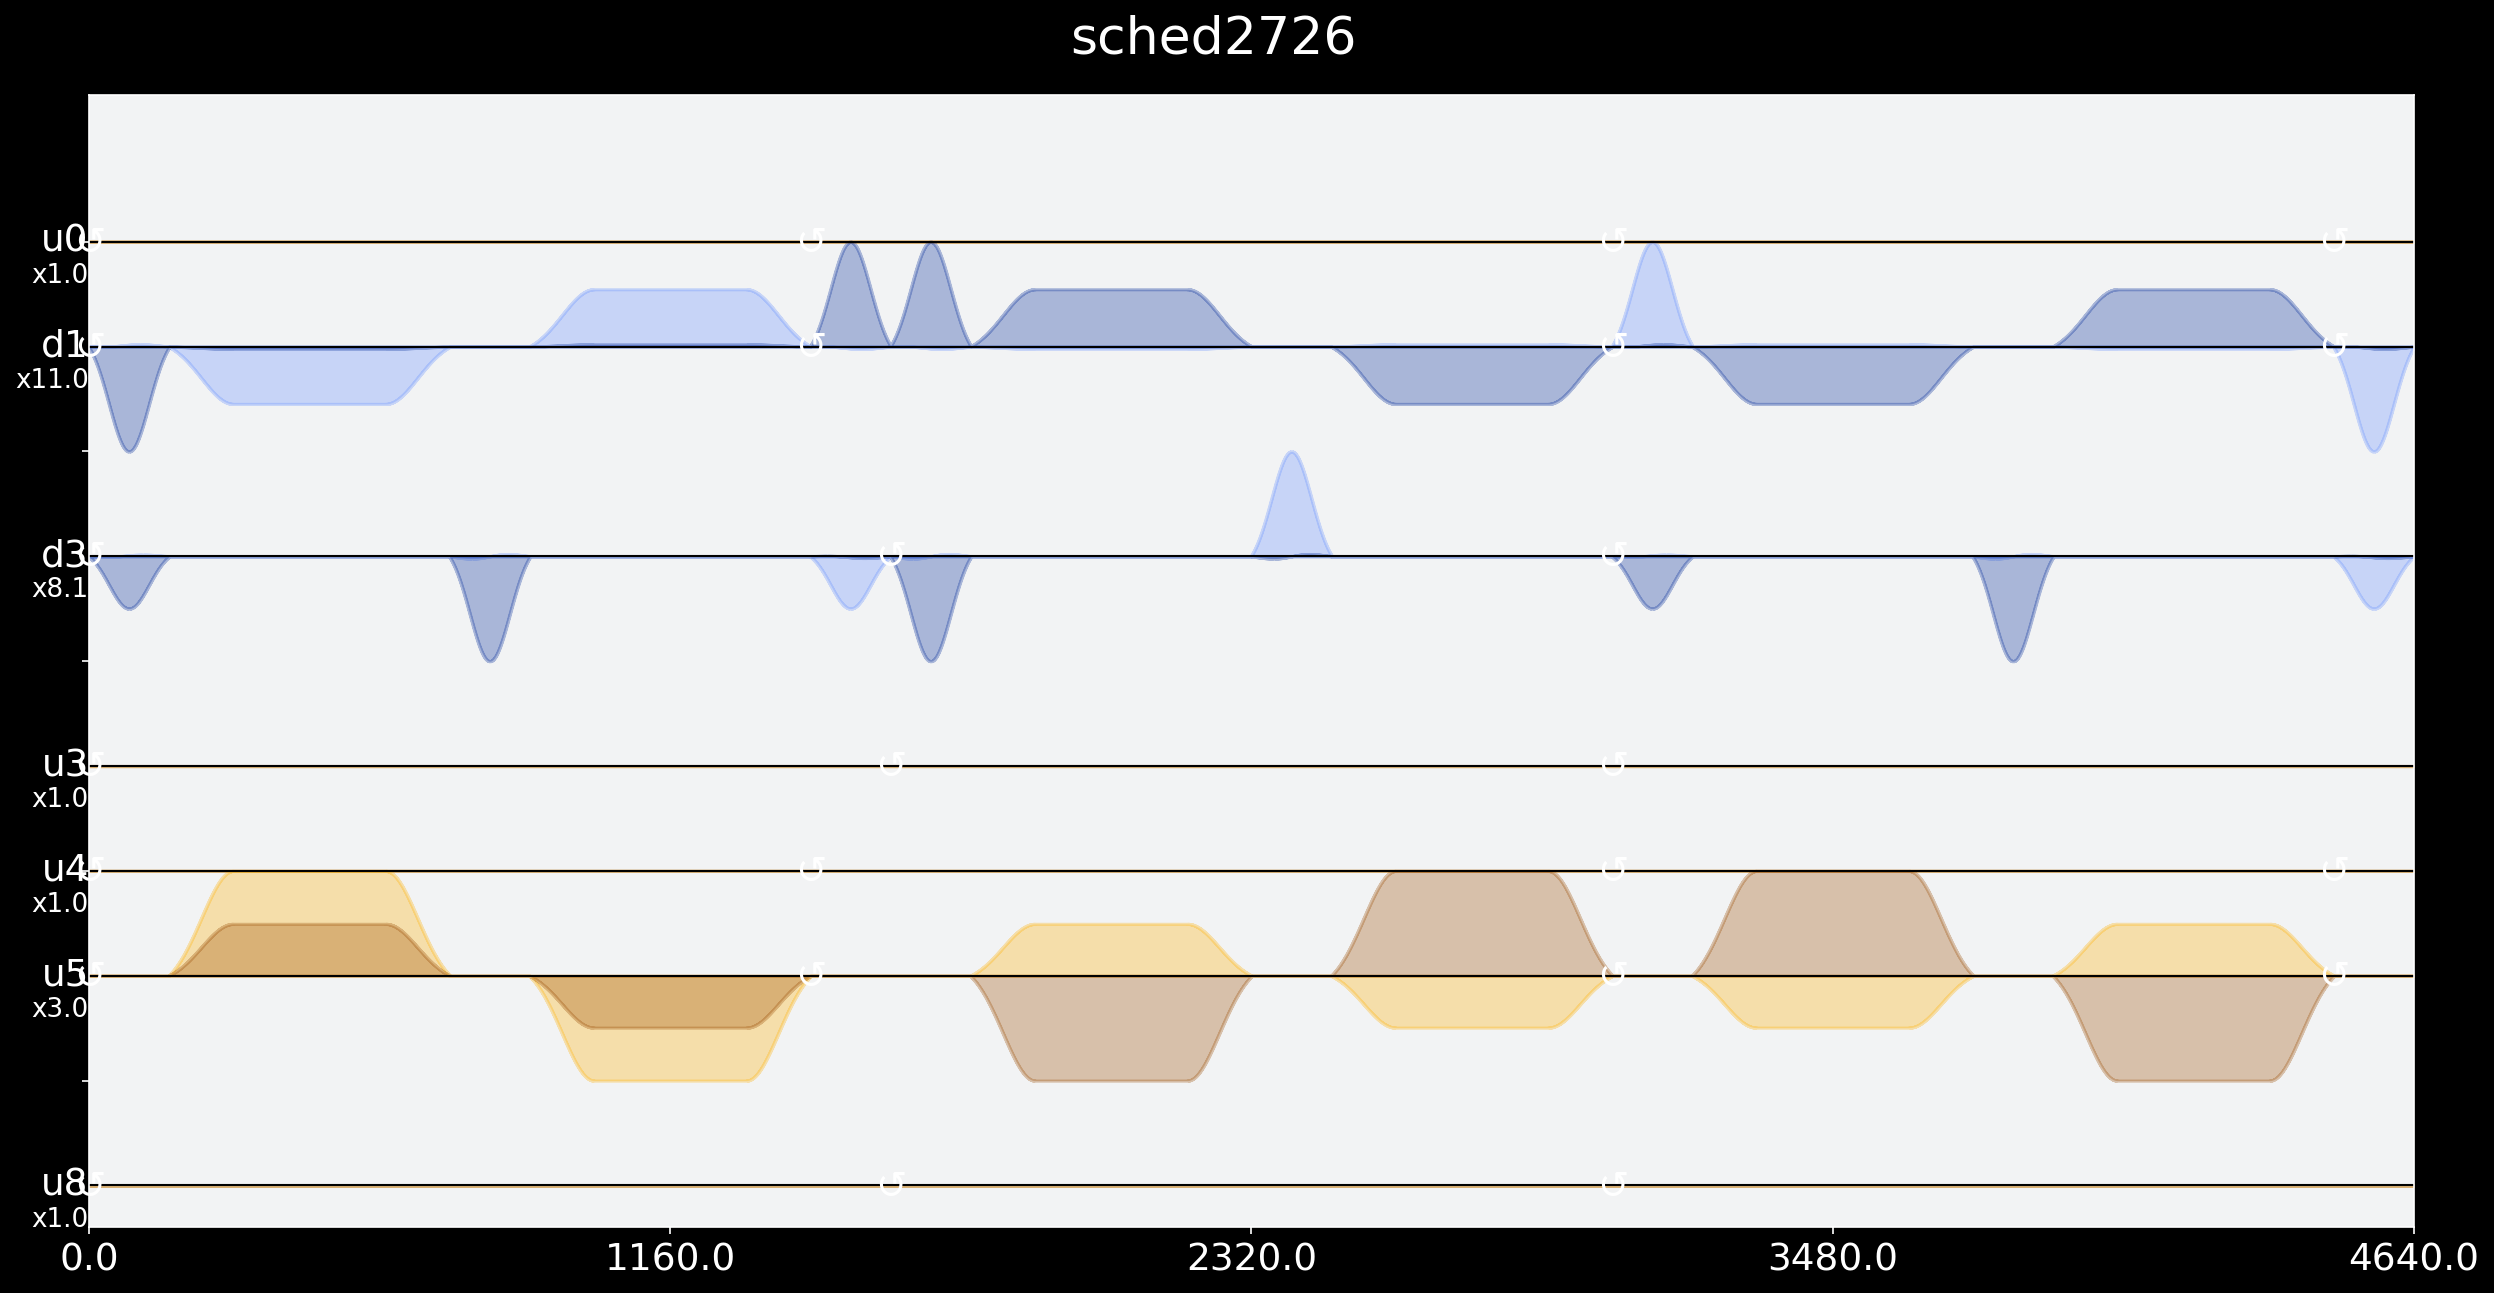

In [53]:
sched = pulse.Schedule()
sched += inst_map.get('cx',[1,3])
sched += inst_map.get('cx',[3,1])
sched += inst_map.get('cx',[1,3])

sched.draw(style=style)

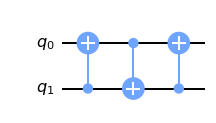

In [70]:
qc = QuantumCircuit(2)
#qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
#qc.swap(0,1)
#qc.x(0)
qc.draw()

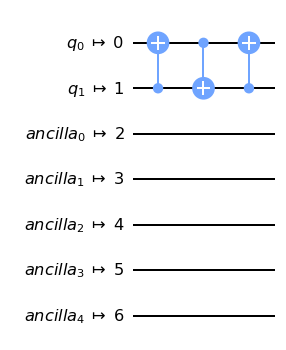

In [71]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
qc_transpiled.draw()

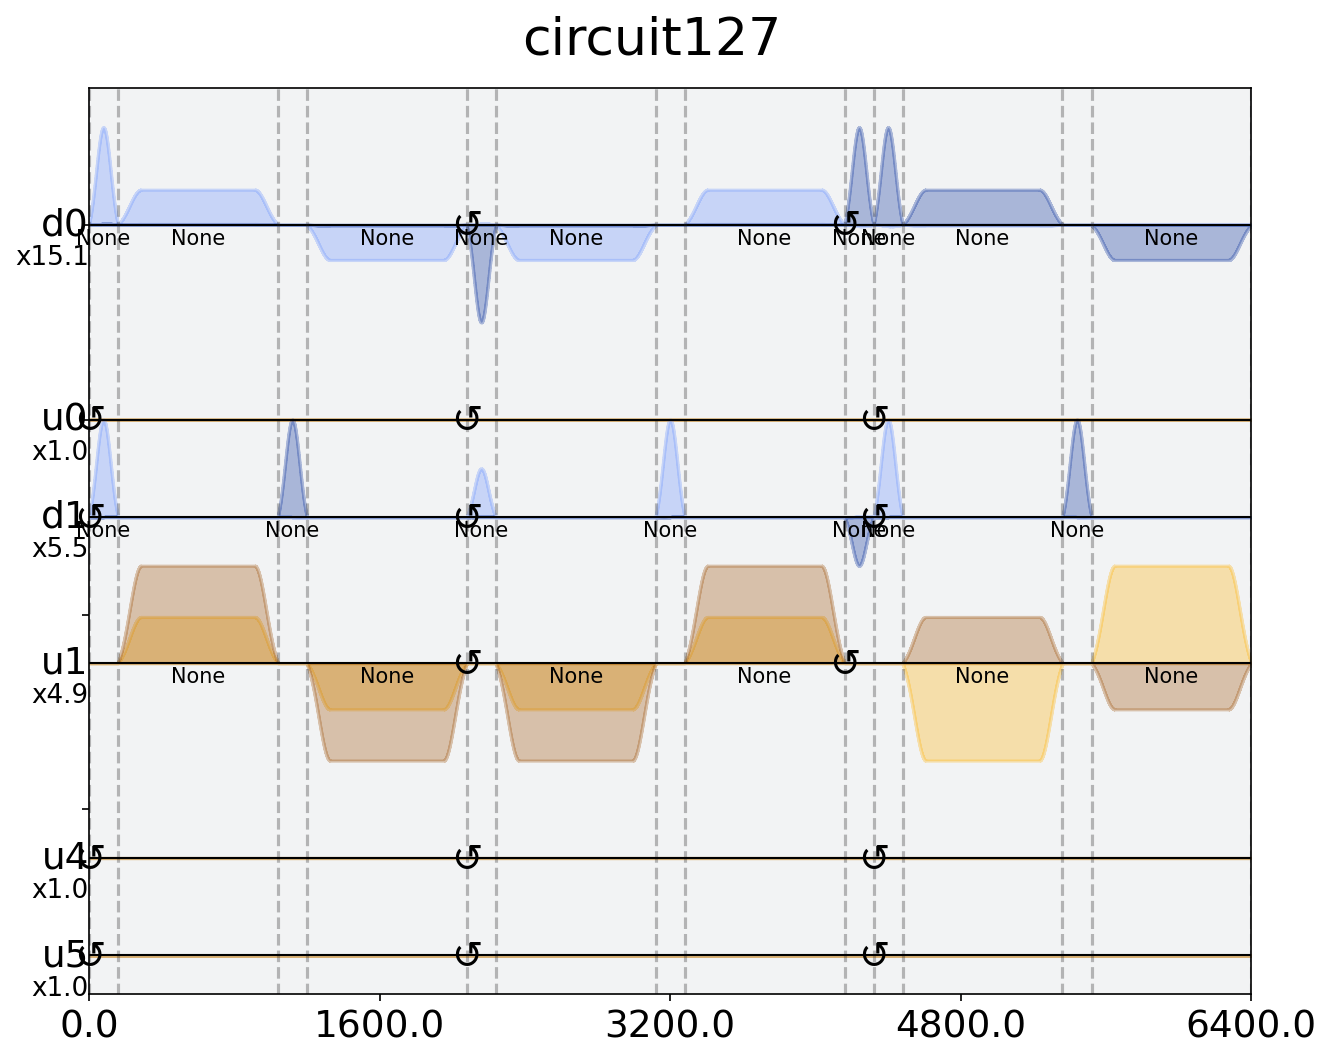

In [72]:
sched = schedule(qc_transpiled, backend, inst_map=inst_map)
pulse_drawer(sched, style=my_style,label=True)

# Controlled-√X gate CSX
https://qiskit.org/documentation/stubs/qiskit.circuit.library.CSXGate.html#qiskit.circuit.library.CSXGate

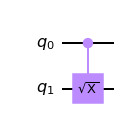

In [48]:
qc = QuantumCircuit(2)
qc.csx(0,1)
#qc.swap(0,1)
#qc.cx(0,1)
qc.draw()

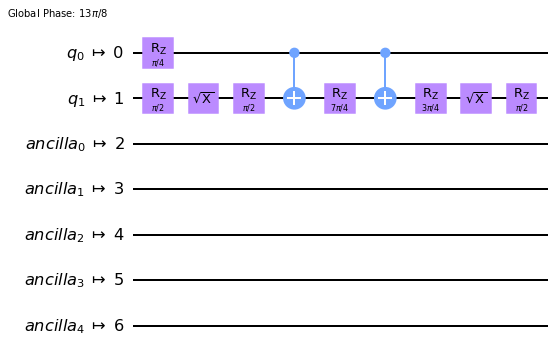

In [49]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
qc_transpiled.draw()

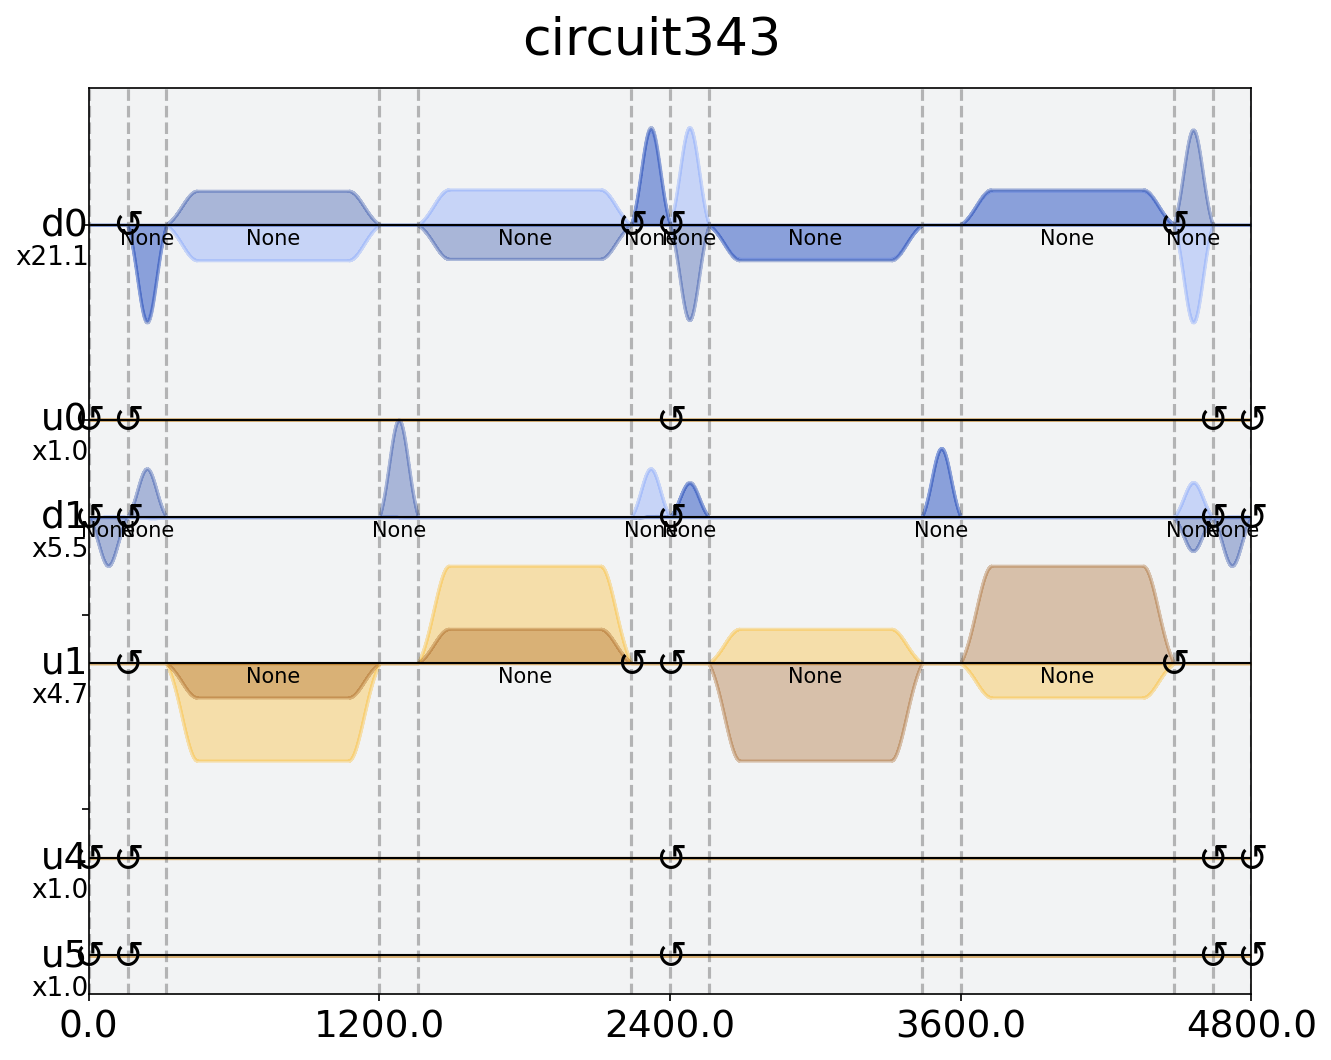

In [50]:
sched = schedule(qc_transpiled, backend, inst_map=inst_map)
pulse_drawer(sched, style=my_style,label=True)
#sched.draw()

# √X gate SX
https://qiskit.org/documentation/stubs/qiskit.circuit.library.SXGate.html#qiskit.circuit.library.SXGate

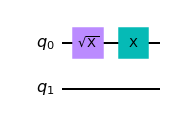

In [58]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.x(0)
qc.draw()

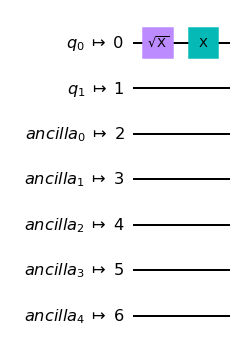

In [59]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
qc_transpiled.draw()

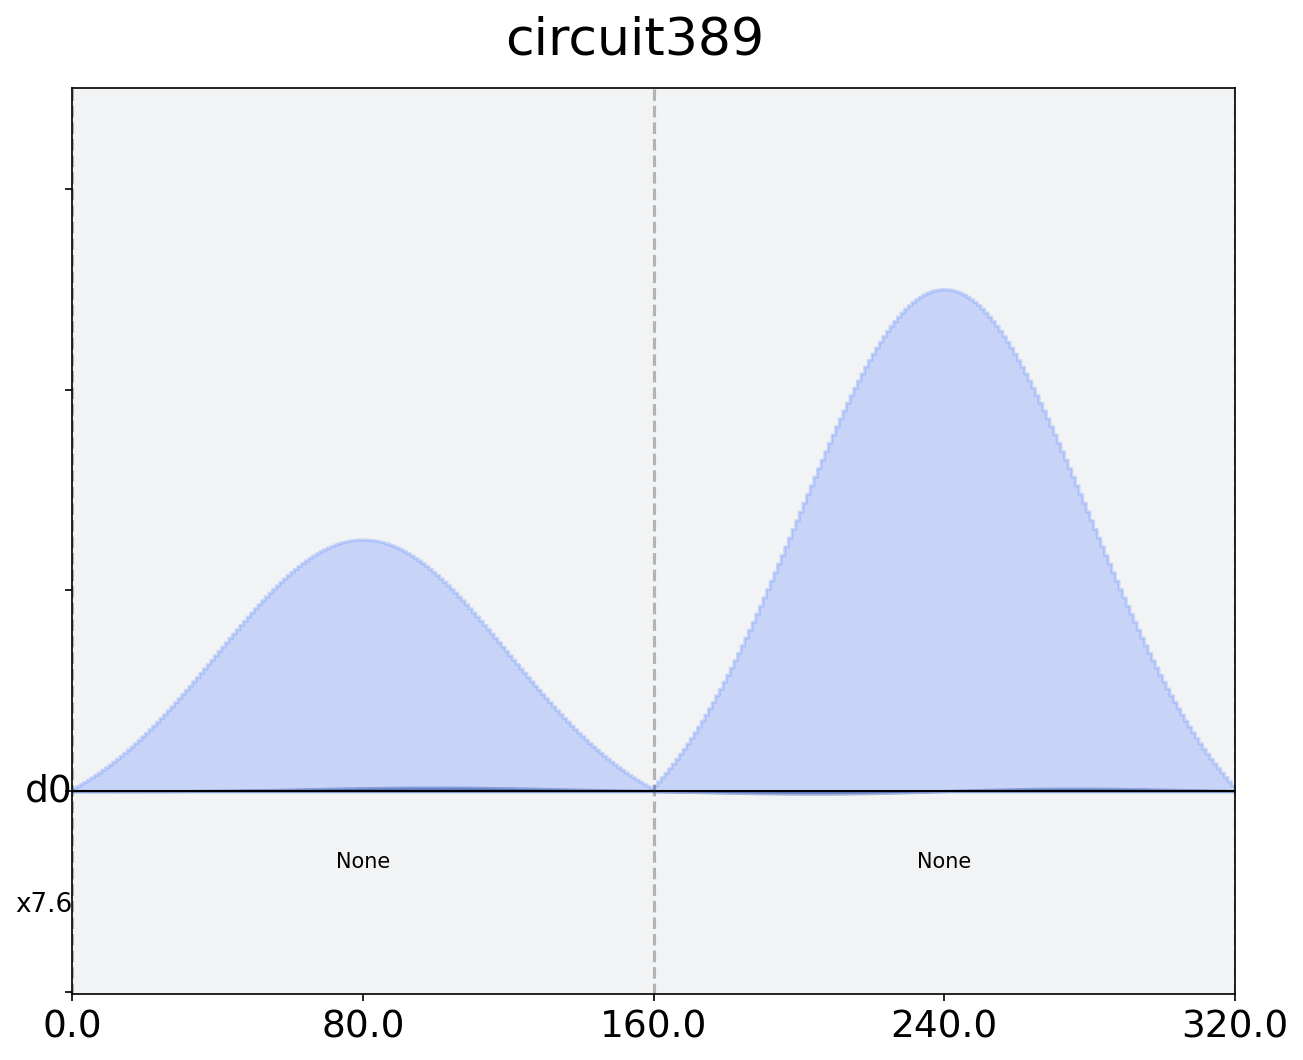

In [66]:
sched = schedule(qc_transpiled, backend, inst_map=inst_map)
pulse_drawer(sched, style=my_style,label=True)

# EfficientSU2
https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html#qiskit.circuit.library.EfficientSU2

The hardware efficient SU(2) 2-local circuit.

The EfficientSU2 circuit consists of layers of single qubit operations spanned by SU(2) and CX entanglements. This is a heuristic pattern that can be used to prepare trial wave functions for variational quantum algorithms or classification circuit for machine learning.

SU(2) stands for special unitary group of degree 2, its elements are 2×2 unitary matrices with determinant 1, such as the Pauli rotation gates.

In [74]:
from qiskit.circuit.library import EfficientSU2
qc = EfficientSU2(2, reps=1)
qc.draw()


{Parameter(θ[0]),
 Parameter(θ[1]),
 Parameter(θ[2]),
 Parameter(θ[3]),
 Parameter(θ[4]),
 Parameter(θ[5]),
 Parameter(θ[6]),
 Parameter(θ[7])}

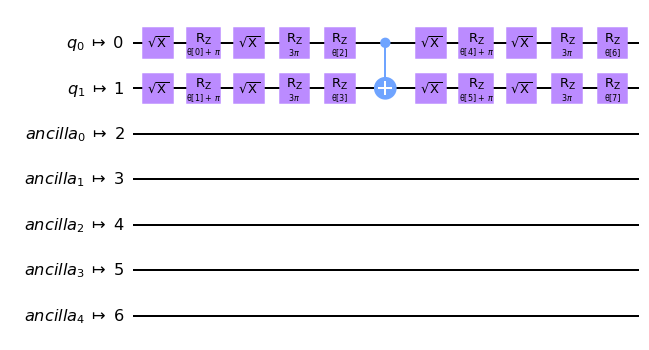

In [76]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
qc_transpiled.draw()

In [80]:
#sched = schedule(qc_transpiled, backend, inst_map=inst_map)
#print(sched)
#pulse_drawer(sched, style=my_style,label=True)

print(qc.parameters)
#qc.bind_parameters()

{Parameter(θ[2]), Parameter(θ[0]), Parameter(θ[4]), Parameter(θ[5]), Parameter(θ[3]), Parameter(θ[6]), Parameter(θ[7]), Parameter(θ[1])}


# RealAmplitudes
https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html#qiskit.circuit.library.RealAmplitudes

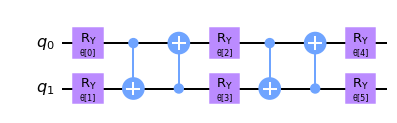

In [81]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(2, reps=2, entanglement=[[0,1], [1,0]],skip_unentangled_qubits=True)
qc = QuantumCircuit(2)
qc.compose(ansatz, inplace=True)
qc.draw()

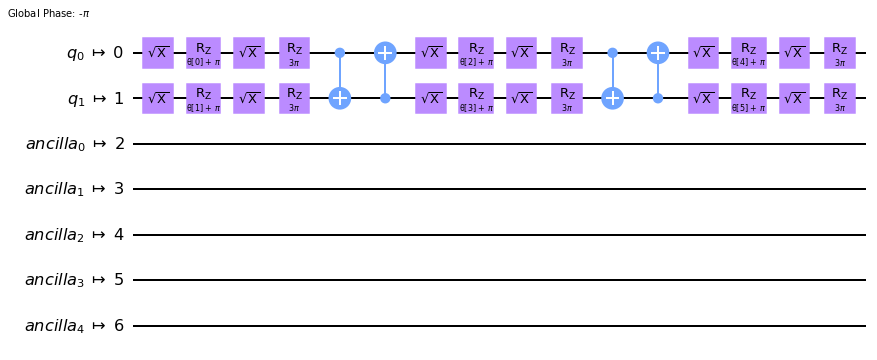

In [82]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
qc_transpiled.draw()

In [84]:
#sched = schedule(qc_transpiled, backend, inst_map=inst_map)
#print(sched)
#pulse_drawer(sched, style=my_style,label=True)

print(qc.parameters)
#qc.bind_parameters()

{Parameter(θ[4]), Parameter(θ[5]), Parameter(θ[1]), Parameter(θ[0]), Parameter(θ[3]), Parameter(θ[2])}
